In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#  Big-O Notation

## Recap

* We want to analyse the runtime and performance of our code
* Logarithmic, linear, quadratic, qubic and exponential times

## Turtle example

In [ ]:
from timeit import default_timer


def do_something():
    start = default_timer()
    # Magic happens here
    end = default_timer()
    return end - start

xs = [do_someting(x) for x in range(4, 8)]

| `lv` | Running time |
| --- | ------- |
| 2 | 0.11665843200171366 |
| 3 | 0.3481470539991278 | 
| 4 | 0.8079697409993969 |
| 5 | 1.7410687139999936 |
| 6 | 3.619540038998821 |
| 7 | 7.414633906002564 |

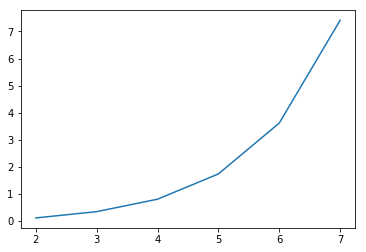

In [11]:
import matplotlib.pyplot as plt

xs = [2, 3, 4, 5, 6, 7]
ys = [0.11665843200171366, 0.3481470539991278, 0.8079697409993969, 1.7410687139999936, 3.619540038998821, 7.414633906002564]

plt.plot(xs, ys)
plt.show()

## Objectives

- To understand why algorithm analysis is important.
- To be able to use "Big-O" to describe execution time.
- To understand the "Big-O" execution time of common operations on Python lists and dictionaries.
- To understand how the implementation of Python data impacts algorithm analysis.
- To understand how to benchmark simple Python programs.

## General Scope

- In general, we are interested in *the performance* of the programs that we write
  - That is, how many seconds/minutes/hours/days is the code going to run?
  


- This is very dependent on the computer we run the program on
  - Can we find something more independent of the actual computer?U
 

## Finding the position of the smallest number in a list

Let's solve the following problem:

We want to find a certain element in a list and return it's position.

  * Input: Given a list of numbers in ascending order. 
  * That is, write a function `find_element_in_a_list(data, element)` with the following behavior:
    ```python
>>> find_element_in_a_list([1, 3, 5], 3)
1
>>> find_element_in_a_list([2 * x for x in range(1000)], 550)
275
```

### Defining the data

In [ ]:
data_list = list(range(1000))
element_to_find = 999

In [ ]:
def find_element_in_a_list(data_list, element):
    for idx, el in enumerate(data_list):
        if el == element:
            return idx

In [ ]:
%time find_element_in_a_list(data_list, element_to_find)

How much is a microsecond?


1 µs = 0.000001 s
= $\dfrac{\dfrac{1s}{1000}}{1000}$ = $\dfrac{1s}{1000^2}$

## Big-O Notation

Describes the **the limiting behaviour of a function** (Wikipedia)

Big-O ignores everything except the **limiting** part of a piece of code. Examples from math:

$f(x) = 2x$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ($x$)

$f(x) = x^{1000} + 100000000$&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ($x^{1000}$)

$f(x) = x^4 + \frac{x}{9} + 2005 * \frac{x^9}{1000}$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;($\frac{x^9}{1000} \approx x^9$)

## Big-O in code

* What is the running time of this?

```python
statement 1
```

* 1 (constant!)
  * $O(1)$

* What is the running time of this?

```python
if (cond): 
    block 1 #sequence of statements
else:
    block 2 #sequence of statements
```

* 1 (constant!)
  * $O(1)$

* What is the running time of this?

```python
statement 1
statement 2
...
statement n
```

```python
total_time = statement 1 + statement 2 + ... + statement n
```

* 1 (constant!)
  * It does **not** depend on the input size. The amount of statements is constant
  * $O(1)$

* What is the running time of this?

```python
for x in range(0, n):
    block 1
```

* Linear
  * The runtime depends on exactly the input (once for each element)
  * $O(n)$

* What is the running time of this?

```python
for x in range(0, n):
    for y in range(0, n):
        block 1
```

* Quadratic
  * Everytime we have one n we need to go through all other n
  * $O(n^2)$ or $(n * n)$

* What is the running time of this?

```python
for x in range(0, n):
    for y in range(0, m):
        block 1
```

* Quadratic
  * But no longer only depending on $n$
  * $O(n * m)$

* Is the runtime complexity of `find_element_in_a_list` and `find_element_double_loop` different?


```python
def find_element_in_a_list(data_list, element):
    for idx, el in enumerate(data_list):
        if el == element:
            return idx


def find_element_double_loop(data_list, element):
    for idx, el in enumerate(data_list):
        if el == element:
            first_result_idx = idx
            break
    for idx, el in enumerate(data_list):
        if el == element and idx == first_result_idx:
            return idx, el
```

Why do we not say $O(2n)$?

  * Because only $n$ matters when the size grows very big in $2n$, the $2$ does not matter anymore:
     * $10 \not\approx 20$
     * $1'000'000 \approx 2'000'000$


Let's say one elementary operation takes 10 nanoseconds, then we get

![](images/runtimes.png)

## Big-O as an approximation

Describes the **the limiting behaviour of a function** (Wikipedia)

Big-O ignores everything except the **limiting** part of a piece of code.

Can be used to know the complexity of your code **without running it**!

## What is the worst-case runtime of this?

```python
def find_element_in_a_list(data_list, element):
    for idx, el in enumerate(data_list):
        if el == element:
            return idx, el
```

How often do we iterate over the elements of the list in the worst case?

## What is the worst-case runtime of this?

```python
def find_element_double_loop(data_list, element):
    for idx, el in enumerate(data_list):
        if el == element:
            first_result_idx = idx
            break
    for idx, el in enumerate(data_list):
        if el == element and idx == first_result_idx:
            return idx, el
```



How often do we iterate over the elements of the list in the worst case?

How often do we iterate over the elements of the list in the worst case?

## What is the worst-case runtime of this?

```python
def find_element_nested_loop(data_list, element):
    for idx, el in enumerate(data_list):
        for idx2, el2 in enumerate(data_list):
            if el == el2 == element and idx == idx2:
                return idx, el
```



How often do we iterate over the elements of the list in the worst case?

## What is the worst-case runtime of this?

```python
def find_element_recursive(data_list, element):
    half_idx = len(data_list) // 2
    
    if element == data_list[half_idx]:
        return half_idx
    elif element < data_list[half_idx]:
        lower_half_list = list(data_list[:half_idx])
        return find_element_recursive(lower_half_list, element)
    elif element > data_list[half_idx]:
        upper_half_list = list(data_list[half_idx:])
        return find_element_recursive(upper_half_list, element)
```

How often do we iterate over the elements of the list in the worst case?

## How to count and _not_ count...

When asked 'count the number of occurrences of all words in a list'. Assuming we have a list of words in `words`, here are two solutions:

In [12]:
words = ['seldom', 'heard', 'him', 'mention', 'her', 'under', 'any', 
         'other', 'name', 'In', 'his', 'eyes', 'she', 'eclipses', 
         'and', 'predominates', 'the', 'whole', 'of', 'her', 'sex', 
         'It', 'was', 'not', 'that', 'he', 'felt', 'any', 'emotion', 
         'akin', 'to', 'love', 'for', 'Irene', 'Adler', 'All', 
         'emotions', 'and', 'that', 'one', 'particularly', 'were', 
         'abhorrent', 'to', 'his', 'cold', 'precise', 'but', 
         'admirably', 'balanced', 'mind', 'He', 'was', 'I', 'take', 
         'it', 'the', 'most', 'perfect', 'reasoning', 'and', 
         'observing', 'machine', 'that', 'the', 'world', 'has', 
         'seen', 'but', 'as', 'a', 'lover', 'he', 'would', 'have', 
         'placed', 'himself', 'in', 'a', 'false', 'position', 'He', 
         'never', 'spoke', 'of', 'the', 'softer', 'passions', 'save', 
         'with', 'a', 'gibe', 'and', 'a', 'sneer']

## How to count and _not_ count...

When asked 'count the number of occurrences of all words in a list'. Assuming we have a list of words in `words`, here are two solutions:

In [ ]:
word_counts = {}
for word in words:
    word_counts.setdefault(word, 0)
    word_counts[word] += 1
print(word_counts)

In [ ]:
word_counts = {}
for word in words:
    counts = words.count(word)
    word_counts[word] = counts
print(word_counts)

In [14]:
print(help([].count))

Help on built-in function count:

count(value, /) method of builtins.list instance
    Return number of occurrences of value.

None


  - What is the running time complexity of each solution? 
  - Which one is thus preferable?